In [3]:
#Importing Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [127]:
#Importing all of the YouGov datasets and renaming 'Unnamed: 0' column
#Method for column name replacement sourced here: https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

ygcabsub_df = pd.read_csv('ygcabsub.csv')
ygchangescountry_df = pd.read_csv('ygchangescountry.csv')
ygchangeslang_df = pd.read_csv('ygchangeslang.csv')
ygfluent_df = pd.read_csv('ygfluent.csv')
ygfreqtv_df = pd.read_csv('ygfreqtv.csv')
ygliketvmov_df = pd.read_csv('ygliketvmov.csv')
ygnosubreason_df = pd.read_csv('ygnosubreason.csv')
ygoptspeed_df = pd.read_csv('ygoptspeed.csv')
ygspeedwatch_df = pd.read_csv('ygspeedwatch.csv')
ygstreamface_df = pd.read_csv('ygstreamface.csv')
ygstreamuse_df = pd.read_csv('ygstreamuse.csv')
ygsubdub_df = pd.read_csv('ygsubdub.csv')
ygsubreason_df = pd.read_csv('ygsubreason.csv')
ygtvfrqsub_df = pd.read_csv('ygtvfrqsub.csv')
ygtvgen_df = pd.read_csv('ygtvgen.csv')
ygtvnosound_df = pd.read_csv('ygtvnosound.csv')
ygtvprefs_df = pd.read_csv('ygtvprefs.csv')
ygtvsubnat_df = pd.read_csv('ygtvsubnat.csv')

ygcabsub_df.columns = ygcabsub_df.columns.str.replace('Unnamed: 0', 'Responses')
ygchangescountry_df.columns = ygchangescountry_df.columns.str.replace('Unnamed: 0', 'Likelihood')
ygchangeslang_df.columns = ygchangeslang_df.columns.str.replace('Unnamed: 0', 'Likelihood')
ygfluent_df.columns = ygfluent_df.columns.str.replace('Unnamed: 0', 'Number of Languages')
ygfreqtv_df.columns = ygfreqtv_df.columns.str.replace('Unnamed: 0', 'Frequency')
ygliketvmov_df.columns = ygliketvmov_df.columns.str.replace('Unnamed: 0', 'Preference')
ygnosubreason_df.columns = ygnosubreason_df.columns.str.replace('Unnamed: 0', 'Responses')
ygoptspeed_df.columns = ygoptspeed_df.columns.str.replace('Unnamed: 0', 'Responses')
ygspeedwatch_df.columns = ygspeedwatch_df.columns.str.replace('Unnamed: 0', 'Experiences')
ygstreamface_df.columns = ygstreamface_df.columns.str.replace('Unnamed: 0', 'Satisfaction')
ygstreamuse_df.columns = ygstreamuse_df.columns.str.replace('Unnamed: 0', 'Responses')
ygsubdub_df.columns = ygsubdub_df.columns.str.replace('Unnamed: 0', 'Preference')
ygsubreason_df.columns = ygsubreason_df.columns.str.replace('Unnamed: 0', 'Responses')
ygtvfrqsub_df.columns = ygtvfrqsub_df.columns.str.replace('Unnamed: 0', 'Frequency')
ygtvgen_df.columns = ygtvgen_df.columns.str.replace('Unnamed: 0', 'Preference')
ygtvnosound_df.columns = ygtvnosound_df.columns.str.replace('Unnamed: 0', 'Frequency')
ygtvprefs_df.columns = ygtvprefs_df.columns.str.replace('Unnamed: 0', 'Preference')
ygtvsubnat_df.columns = ygtvsubnat_df.columns.str.replace('Unnamed: 0', 'Preference')

ygsubreason_df.head()

,Responses,Total,Male,Female,18-29,30-44,45-64,65+,White,Black,...,Rep,Biden,Trump,<50k,$50-100k,$100k+,Northeast,Midwest,South,West
0,Hearing difficulties,19,18,21,25,17,12,27,20,10,...,18,20,20,18,20,21,23,14,17,26
1,Learning a new language,7,8,5,14,11,2,1,6,9,...,4,6,4,7,8,7,15,5,5,5
2,Enhanced comprehension,27,26,27,36,36,19,20,25,23,...,20,32,24,23,29,27,23,24,27,31
3,Sound sensitivity,10,10,11,19,11,8,6,10,11,...,5,16,7,9,11,15,10,11,10,12
4,Helps to understand accents,26,23,29,41,30,29,18,23,27,...,17,33,21,23,27,33,29,19,22,39


Overall, the biggest challenge with this project was attempting to figure out a way to update the values indexed in the x-axis across the various dataset updates. Based on the plotly forum regarding wrong values, this is a potential bug in Plotly that the development team has been aware of. Some ideas for potential solutions are reindexing the variables in the first column (I tried this with numerical values but I continued to run into the same issue), creating a for loop to update the Plotly figures, or creating a new dictionary for the values in the first column. Ideally, I'd like to try to put this project together using a different graphing library than Plotly with GUI functionality. Unfortunately, I did not notice this glaring issue until I had finished putting together the dropdown system in Plotly

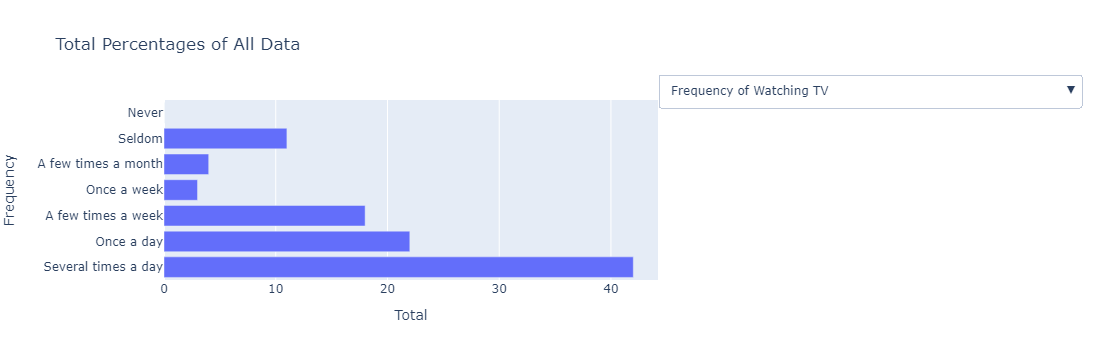

In [128]:
#All of my columns across the datasets share the same categories. 
#Here I am going to represent each demographic within a bar graph that can be toggled between datasets
#Each cell will represent a single demographic. Here, the Total categories are represented
#Many difficulties and challenges were encountered here. Here is what I referenced to try to resolve issues:
#https://stackoverflow.com/questions/65941253/plotly-how-to-toggle-traces-with-a-button-similar-to-clicking-them-in-legend
#https://plotly.com/python/custom-buttons/
#https://community.plotly.com/t/plotly-showing-wrong-values-unsorted/35804/2
#https://plotly.com/python-api-reference/generated/plotly.express.bar
#https://projector-video-pdf-converter.datacamp.com/25676/chapter4.pdf
#https://stackoverflow.com/questions/69354451/how-to-add-a-button-to-a-plotly-express-graph-to-update-a-specific-value
#https://plotly.com/python/reference/layout/updatemenus/#layout-updatemenus-items-updatemenu-buttons-items-button-args2

fig1 = px.bar(ygfreqtv_df, x = 'Total', y = 'Frequency', title = "Total Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig1.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig1.show()


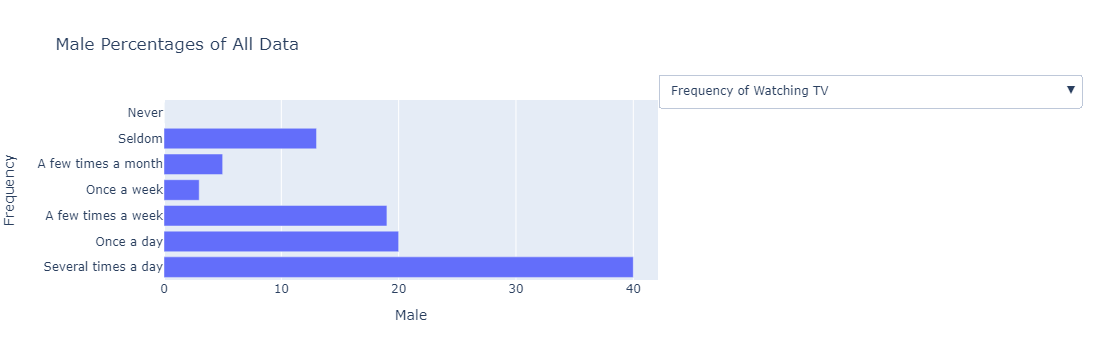

In [129]:
fig2 = px.bar(ygfreqtv_df, x = 'Male', y = 'Frequency', title = "Male Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig2.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig2.show()

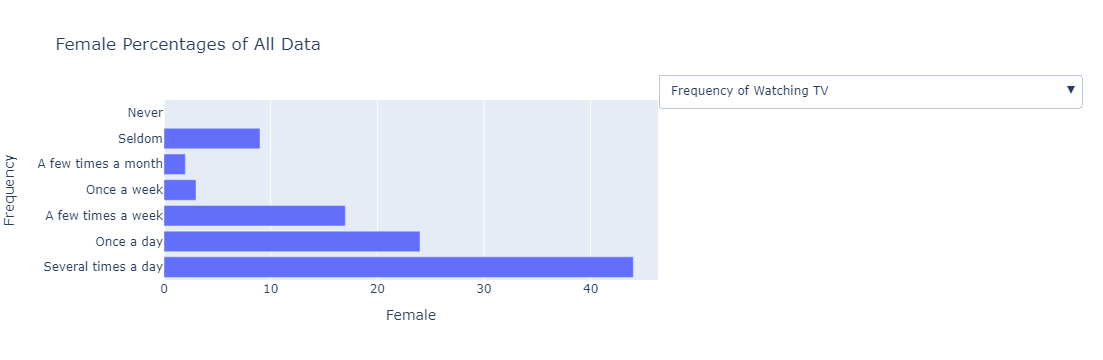

In [130]:
fig3 = px.bar(ygfreqtv_df, x = 'Female', y = 'Frequency', title = "Female Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig3.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig3.show()

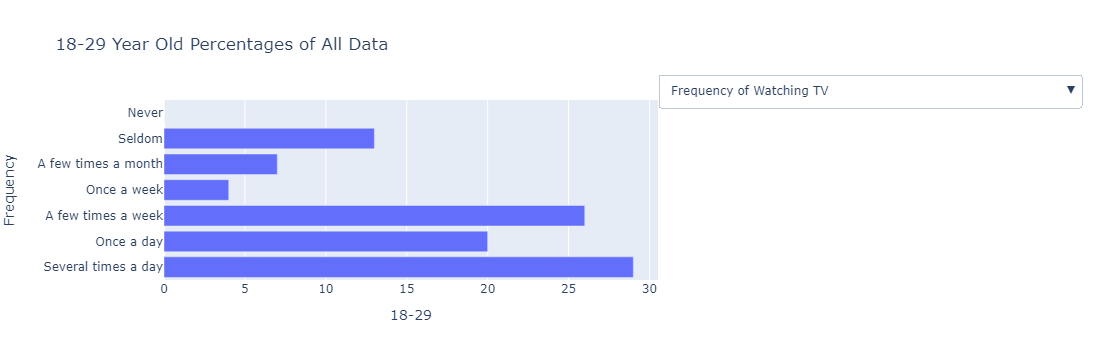

In [131]:
fig4 = px.bar(ygfreqtv_df, x = '18-29', y = 'Frequency', title = "18-29 Year Old Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig4.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig4.show()

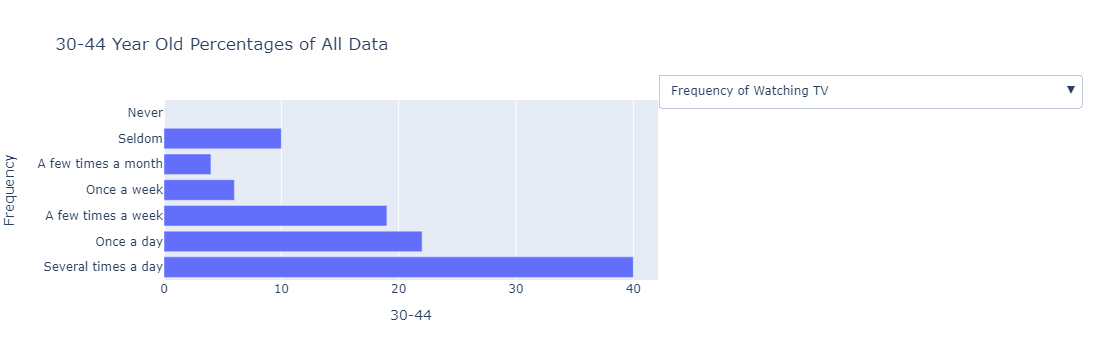

In [132]:
fig5 = px.bar(ygfreqtv_df, x = '30-44', y = 'Frequency', title = "30-44 Year Old Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig5.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig5.show()

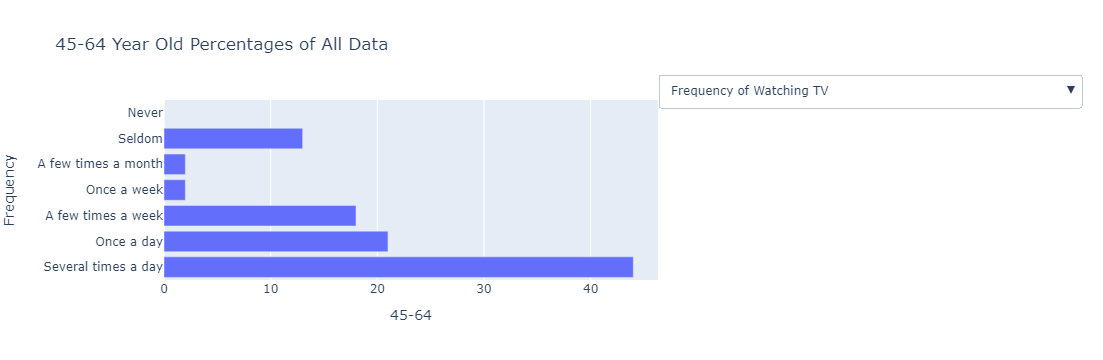

In [133]:
fig6 = px.bar(ygfreqtv_df, x = '45-64', y = 'Frequency', title = "45-64 Year Old Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig6.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig6.show()

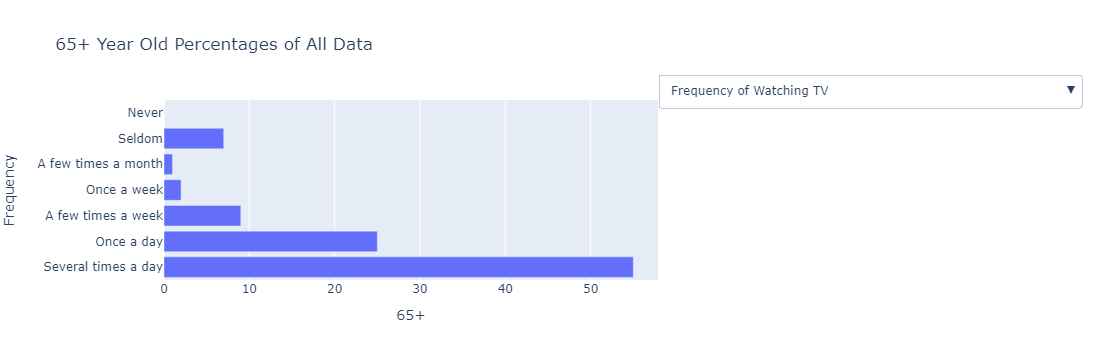

In [135]:
fig7 = px.bar(ygfreqtv_df, x = '65+', y = 'Frequency', title = "65+ Year Old Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig7.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig7.show()

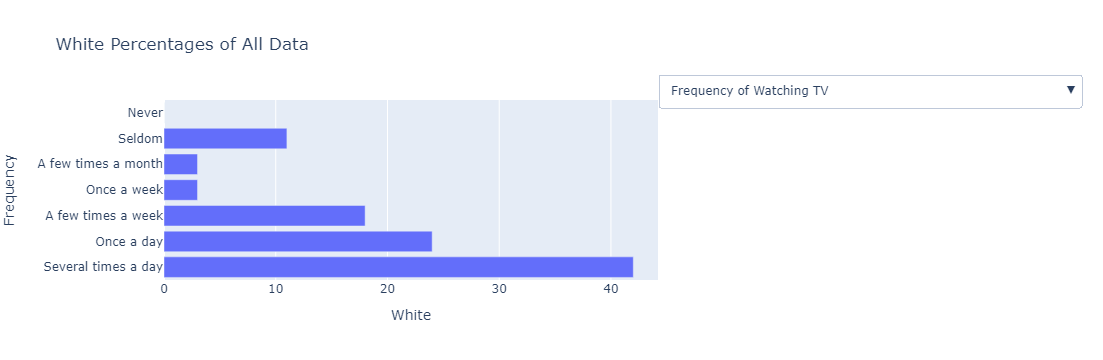

In [136]:
fig8 = px.bar(ygfreqtv_df, x = 'White', y = 'Frequency', title = "White Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig8.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig8.show()

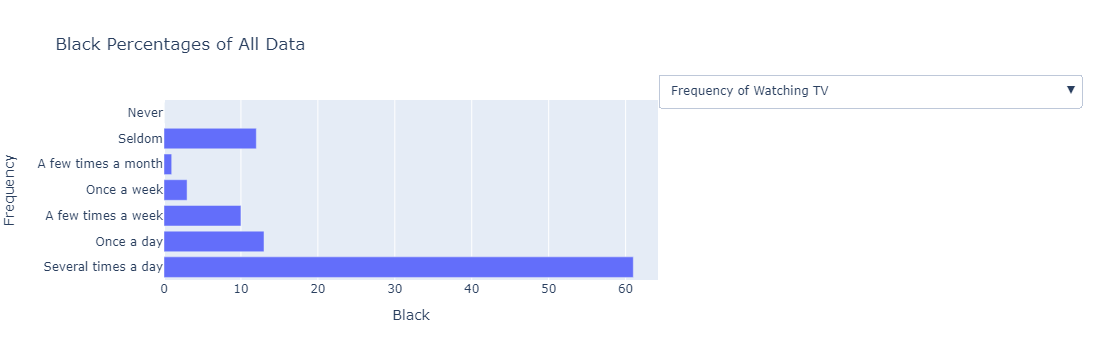

In [137]:
fig9 = px.bar(ygfreqtv_df, x = 'Black', y = 'Frequency', title = "Black Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig9.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig9.show()

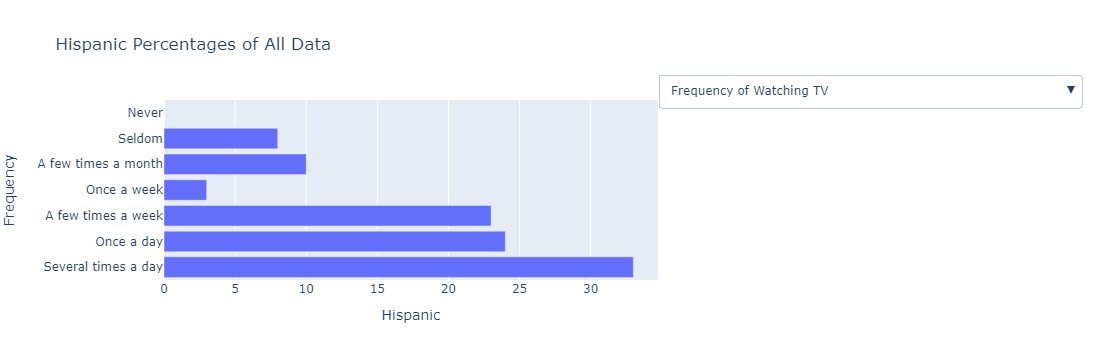

In [138]:
fig10 = px.bar(ygfreqtv_df, x = 'Hispanic', y = 'Frequency', title = "Hispanic Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig10.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig10.show()

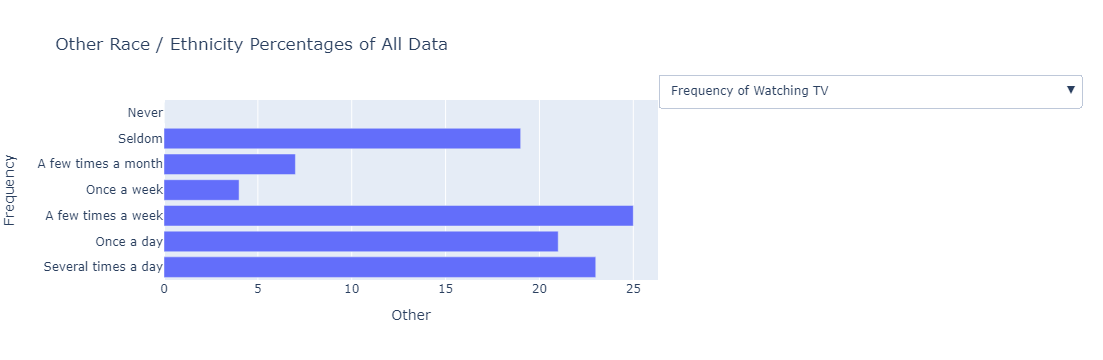

In [139]:
fig11 = px.bar(ygfreqtv_df, x = 'Other', y = 'Frequency', title = "Other Race / Ethnicity Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig11.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig11.show()

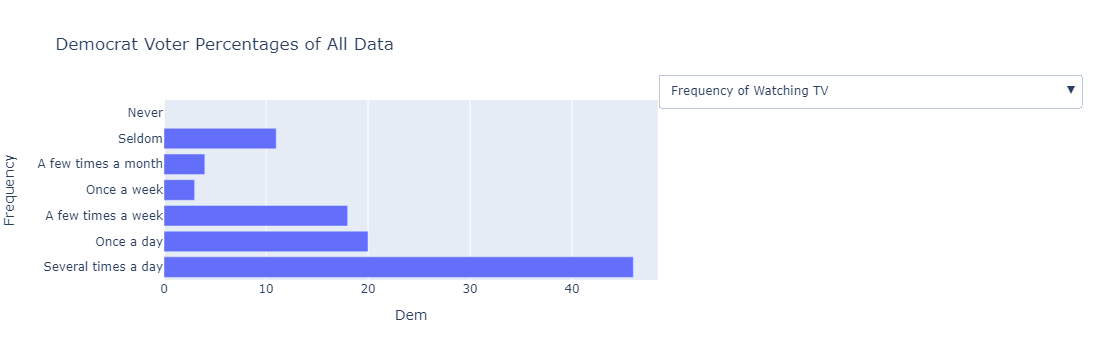

In [140]:
fig12 = px.bar(ygfreqtv_df, x = 'Dem', y = 'Frequency', title = "Democrat Voter Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig12.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig12.show()

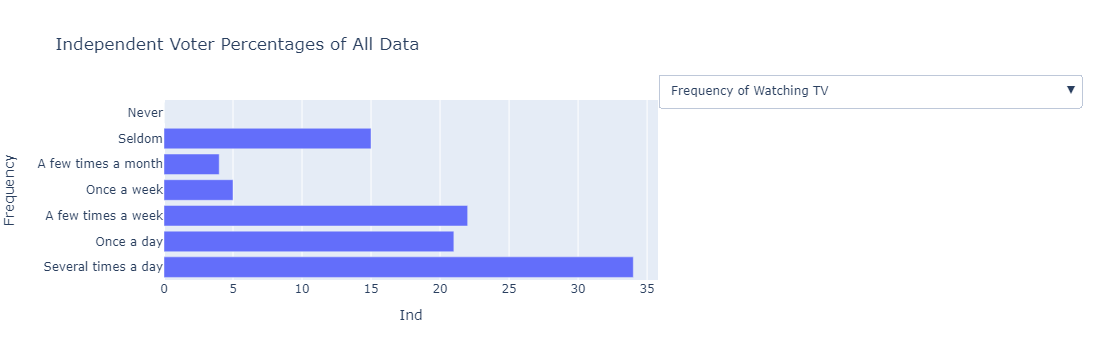

In [141]:
fig13 = px.bar(ygfreqtv_df, x = 'Ind', y = 'Frequency', title = "Independent Voter Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig13.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig13.show()

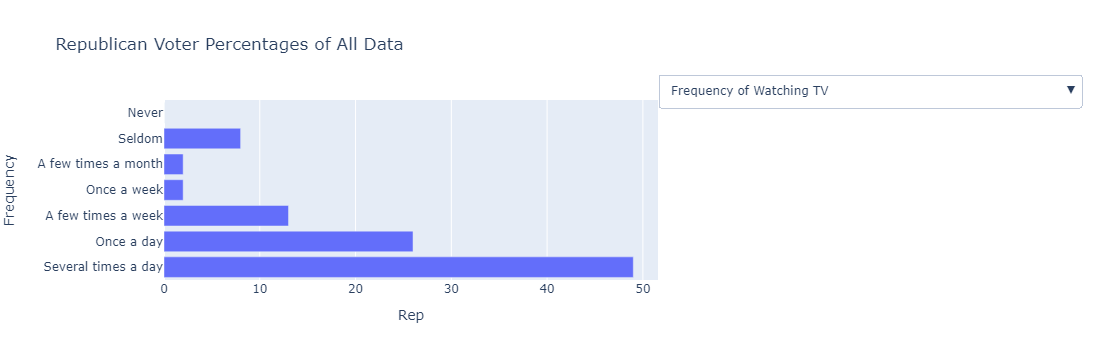

In [142]:
fig14 = px.bar(ygfreqtv_df, x = 'Rep', y = 'Frequency', title = "Republican Voter Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig14.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig14.show()

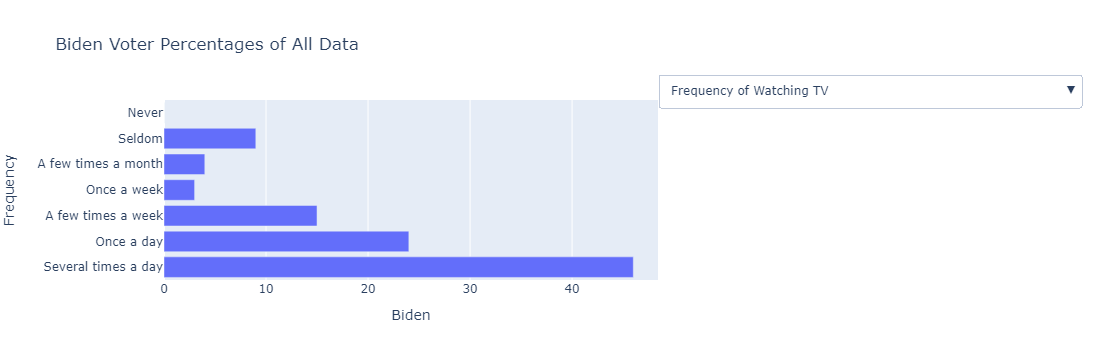

In [143]:
fig15 = px.bar(ygfreqtv_df, x = 'Biden', y = 'Frequency', title = "Biden Voter Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig15.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig15.show()

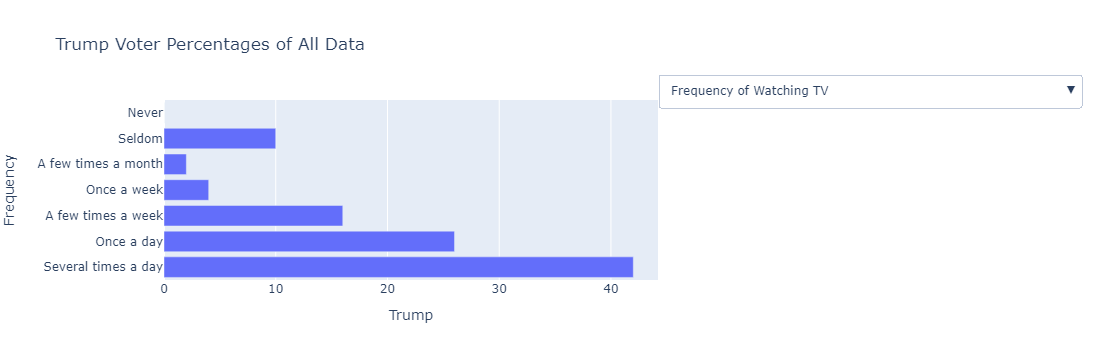

In [144]:
fig16 = px.bar(ygfreqtv_df, x = 'Trump', y = 'Frequency', title = "Trump Voter Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig16.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig16.show()

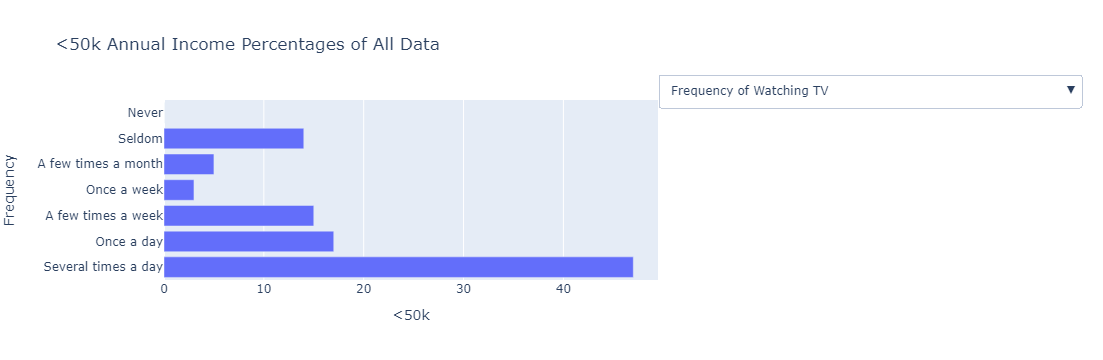

In [145]:
fig17 = px.bar(ygfreqtv_df, x = '<50k', y = 'Frequency', title = "<50k Annual Income Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig17.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig17.show()

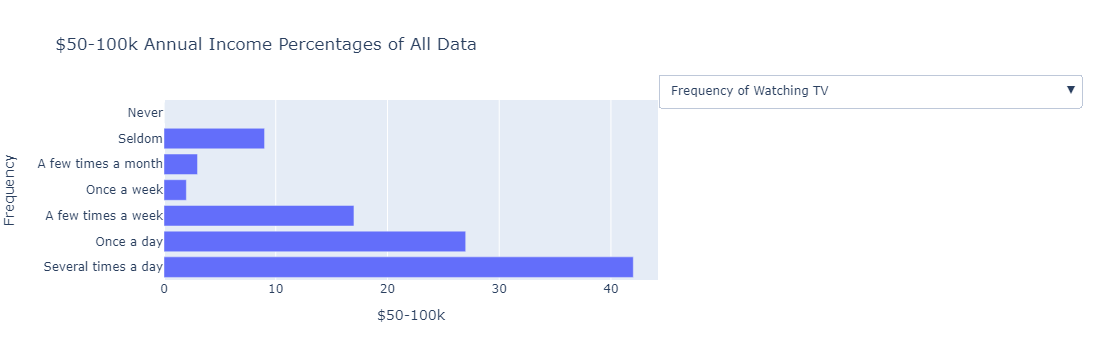

In [146]:
fig18 = px.bar(ygfreqtv_df, x = '$50-100k', y = 'Frequency', title = "$50-100k Annual Income Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig18.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig18.show()

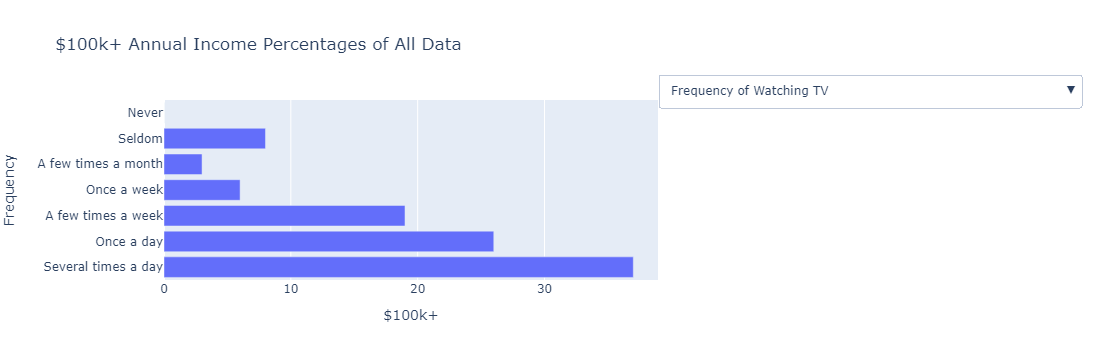

In [147]:
fig19 = px.bar(ygfreqtv_df, x = '$100k+', y = 'Frequency', title = "$100k+ Annual Income Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig19.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig19.show()

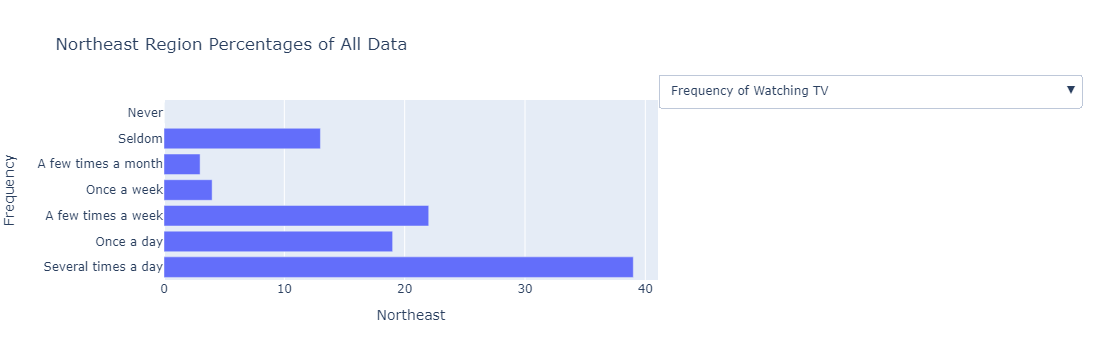

In [148]:
fig20 = px.bar(ygfreqtv_df, x = 'Northeast', y = 'Frequency', title = "Northeast Region Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig20.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig20.show()

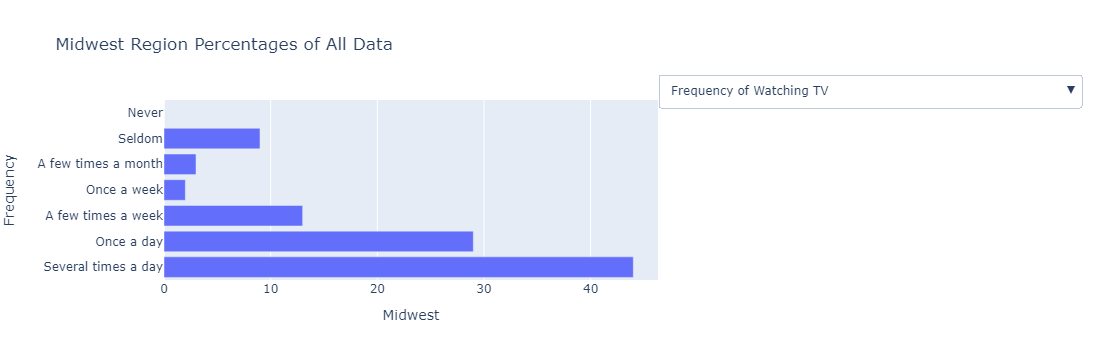

In [149]:
fig21 = px.bar(ygfreqtv_df, x = 'Midwest', y = 'Frequency', title = "Midwest Region Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig21.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig21.show()

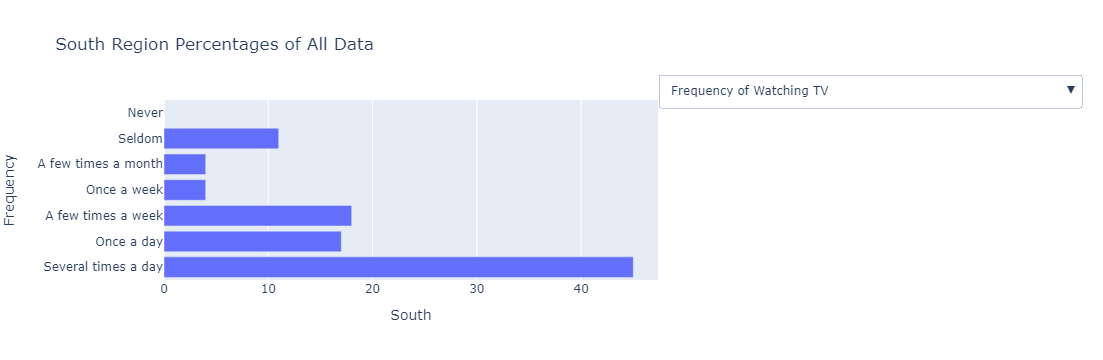

In [150]:
fig22 = px.bar(ygfreqtv_df, x = 'South', y = 'Frequency', title = "South Region Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig22.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig22.show()

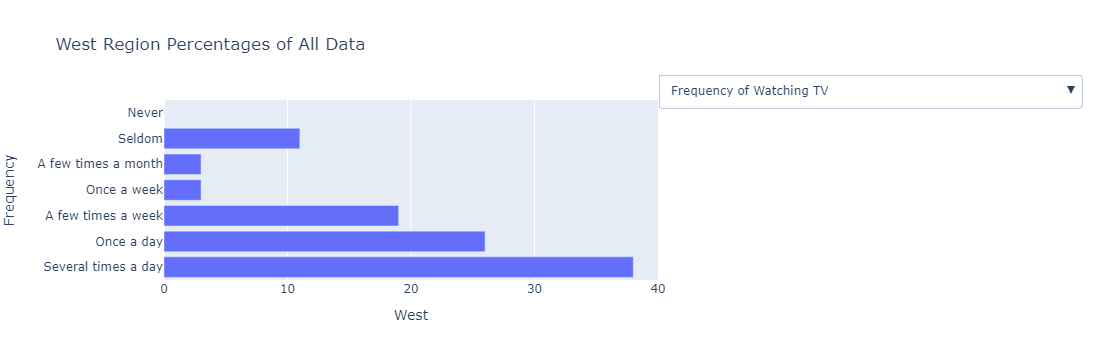

In [151]:
fig23 = px.bar(ygfreqtv_df, x = 'West', y = 'Frequency', title = "West Region Percentages of All Data")
button1 = {'method': 'update',
          'label': 'Frequency of Watching TV'    ,
          'args': [
              {'y': [ygfreqtv_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button2 = {'method': 'update',
          'label': 'Cable Subscription'    ,
          'args': [
              {'y': [ygcabsub_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button3 = {'method': 'update',
          'label': 'Uses Streaming'    ,
          'args': [
              {'y': [ygstreamuse_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          } 
button4 = {'method': 'update',
          'label': 'TV Genres Enjoyed'    ,
          'args': [
              {'y': [ygtvgen_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          } 
button5 = {'method': 'update',
          'label': 'Frequency of Watching TV with No Sound'    ,
          'args': [
              {'y': [ygtvnosound_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          } 
button6 = {'method': 'update',
          'label': 'Watching TV with Subtitles in Native Language'    ,
          'args': [
              {'y': [ygtvsubnat_df['Preference']]   },
              { 'yaxis.title': 'Preference'  },
              ]
          }
button7 = {'method': 'update',
          'label': 'Reasons for Using Subtitles'    ,
          'args': [
              {'y': [ygsubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button8 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygtvfrqsub_df['Frequency']]   },
              { 'yaxis.title': 'Frequency'  },
              ]
          }
button9 = {'method': 'update',
          'label': 'Reasons for Not Using Subtitles'    ,
          'args': [
              {'y': [ygnosubreason_df['Responses']]   },
              { 'yaxis.title': 'Responses'  },
              ]
          }
button10 = {'method': 'update',
          'label': 'Frequency of Watching TV with Subtitles'    ,
          'args': [
              {'y': [ygsubdub_df['Preference']]   },
              { 'yaxis.title': 'Preference for Dub or Sub for Watching TV in a Foreign Language'  },
              ]
          }
button11 = {'method': 'update',
          'label': 'Like TV or Movies More'    ,
          'args': [
              {'y': [ygliketvmov_df['Preference']]   },
              { 'yaxis.title': 'Like TV or Movies More'  },
              ]
          }
button12 = {'method': 'update',
          'label': 'Satisfaction with Streaming Interface'    ,
          'args': [
              {'y': [ygstreamface_df['Satisfaction']]   },
              { 'yaxis.title': 'Satisfaction'  },
              ]
          }
button13 = {'method': 'update',
          'label': 'Speed Watching Option'    ,
          'args': [
              {'y': [ygoptspeed_df['Responses']]   },
              { 'yaxis.title': 'Speed Watching Option'  },
              ]
          }
button14 = {'method': 'update',
          'label': 'Would you try Speed Watching?'    ,
          'args': [
              {'y': [ygspeedwatch_df['Experiences']]   },
              { 'yaxis.title': 'Would you try Speed Watching?'  },
              ]
          }
button15 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Country'    ,
          'args': [
              {'y': [ygchangescountry_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Country'  },
              ]
          }
button16 = {'method': 'update',
          'label': 'Likelihood of New Content Being Produced in Foreign Language'    ,
          'args': [
              {'y': [ygchangeslang_df['Likelihood']]   },
              { 'yaxis.title': 'Likelihood of New Content Being Produced in Foreign Language'  },
              ]
          }
button17 = {'method': 'update',
          'label': 'Preferences of TV Attributes'    ,
          'args': [
              {'y': [ygtvprefs_df['Preference']]   },
              { 'yaxis.title': 'Preferences of TV Attributes'  },
              ]
          }
button18 = {'method': 'update',
          'label': 'Number of Languages Spoken Fluently'    ,
          'args': [
              {'y': [ygfluent_df['Number of Languages']]   },
              { 'yaxis.title': 'Number of Languages Sppoken Fluently'  },
              ]
          }

fig23.update_layout(
    updatemenus=[{
        'type': 'dropdown',
        'direction': "down",
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 1,
        'xanchor': "left",
        'y': 1.2,
        'yanchor': "top",
        'buttons': [button1, button2, button3, button4, button5, button6, button7, button8, button9, button10, button11, button12, button13, button14, button15, button16, button17, button18],
    }]
)
fig23.show()